# Presentation Notebook - Final Project 2: `gravity`

This notebook contains physics questions to be answered as part of the `gravity` final project - see companion assignment notebook for details.

## Honor Code Pledge

Please type your name in the box below to agree to the Honor Code Pledge for this assignment:

__"On my honor, as a University of Colorado Boulder student, I have neither given nor received unauthorized assistance."__

Lucas Rossi


In [3]:
import numpy as np

import matplotlib.pyplot as plt
from gravity import *


# Physics Questions

Add cells below as necessary to answer each of the physics questions.

__Make sure your notebook runs with no errors by using the "Restart & Run All" command before you submit!__

### 1.  Testing with planetary orbits

First, check your model of the solar system.  Using the orbital model, the data in `planets.csv`, and the `update_all_planets()` function, __show the paths traced out__ by all of the planets in (A) __one Earth year__, and (B) __one Neptunian year (= 165 years.)__  Explain why the plots that you create confirm that your code is working.

As a second test, let's consider an object we didn't include in our list of major planets: the dwarf planet Pluto.  Using the same conventions as in the assignment notebook, Pluto's orbital parameters are as follows:

| object | a (AU) | $\epsilon$ | $\omega$ (${}^{\circ}$) | $\phi_0$ (${}^{\circ}$) |
|--------|--------|------------|-------------------------|-------------------------|
| Pluto  | 39.48211675 | 0.24882730 | 113.79534612 | 265.9093415 |

This is ignoring the orbital inclination of Pluto - the fact that its orbit is tilted by about 20 degrees relative to the Earth's orbital plane.  Ignoring this is not a great approximation, but including it makes the math of our simulations a lot more complicated, so let's just pretend that Pluto's orbit is in the same plane as everything else.

Knowing what Pluto's orbit should look like gives you a good opportunity to check your `find_trajectory` solver.  Treating Pluto as a "test mass", use the following initial conditions:

```python
r0 = [-11.9661, 27.1367, 0.]  # AU
v0 = [-3.7382e-8, -1.6484e-8, 0.]  # AU/s
```

and __show that you recover an elliptical orbit for Pluto which matches__ the one described by the orbital parameters above.  (They should also both match the observed fact that Pluto's orbit slightly crosses Neptune's orbit.)

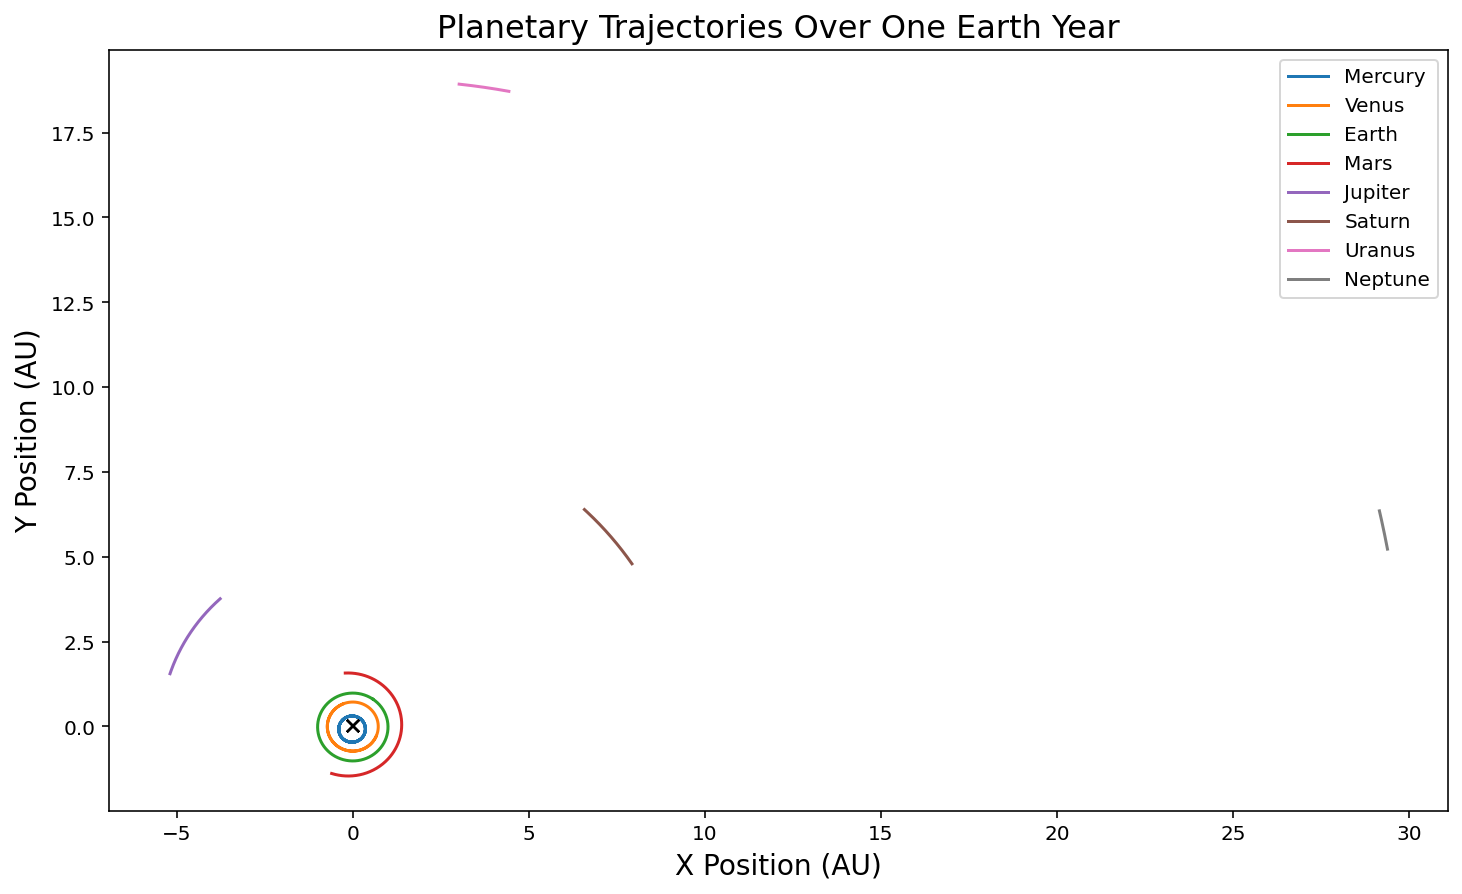

In [4]:
planet_names = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn','Uranus','Neptune']  

dt = 86400 # Timestep of a day in seconds
for i in range(0,len(planets)): #iterate over each planet in planets array
    #initialize lists to store planets positions
    x_position = []
    y_position = []
    for j in range(0,365):#iterate over 365 days
        update_all_planets(planets, dt) #update the planets position after every iteration       
        x_position.append(get_planet_coords(planets)[i][0])
        y_position.append(get_planet_coords(planets)[i][1])    
    plt.plot(x_position, y_position, label=planet_names[i])
   
    plt.plot([0], [0], marker='x', color='black') #Sun
    plt.xlabel('X Position (AU)', fontsize=14)
    plt.ylabel('Y Position (AU)', fontsize=14)
    plt.title('Planetary Trajectories Over One Earth Year', fontsize=16)
    plt.legend(loc='upper right', fontsize=10)
    



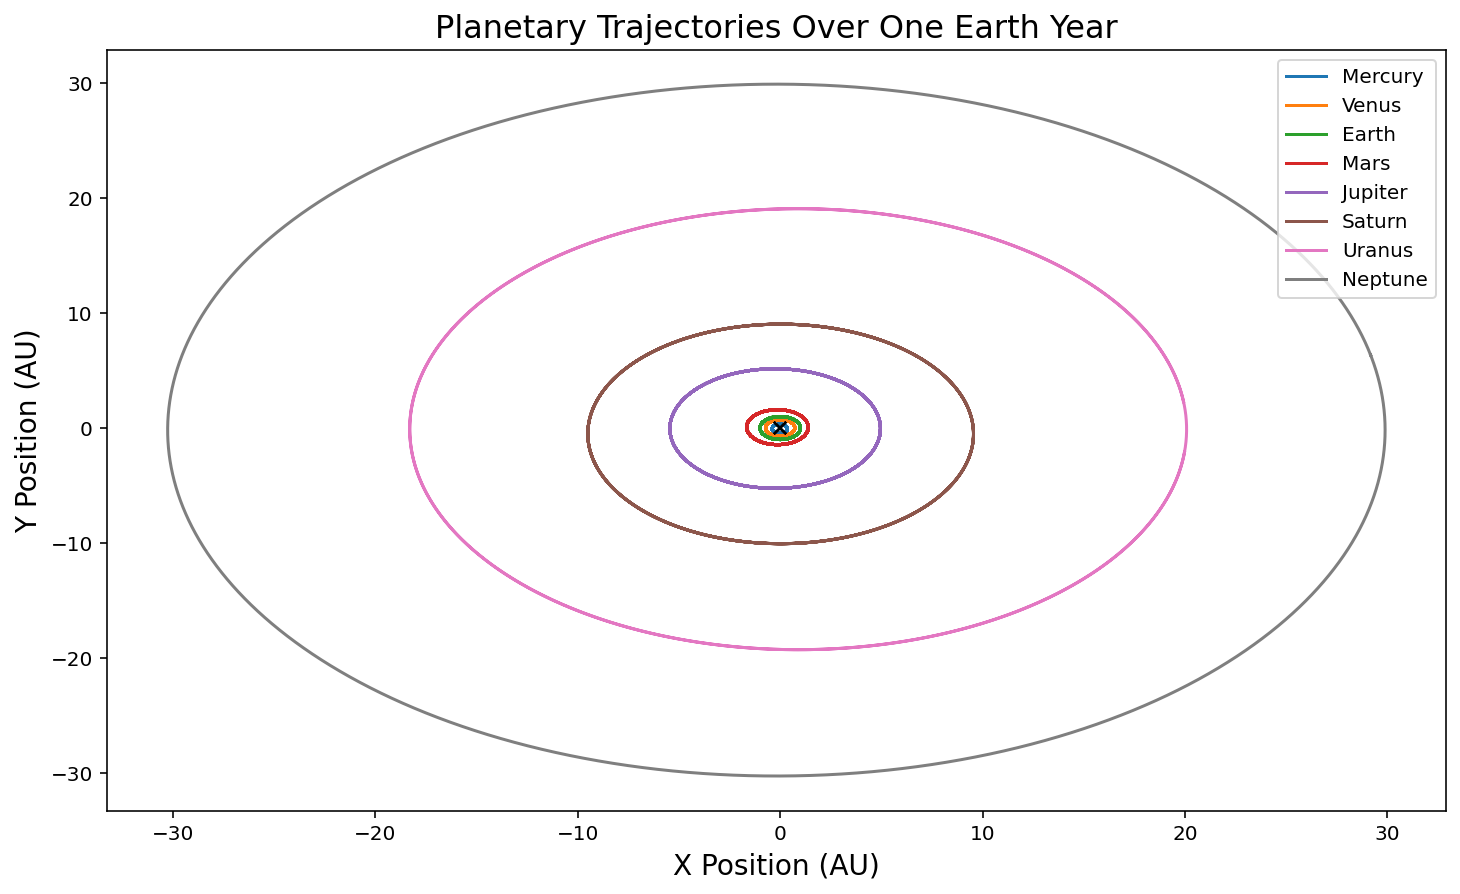

In [5]:


dt = 86400 # Timestep of a day in seconds
for i in range(0,len(planets)): #iterate over each planet in planets array
    #initialize lists to store planets positions
    x_position = []
    y_position = []
    for j in range(0,365*165):#iterate over 365 days
        update_all_planets(planets, dt) #update the planets position after every iteration       
        x_position.append(get_planet_coords(planets)[i][0])
        y_position.append(get_planet_coords(planets)[i][1])    
    plt.plot(x_position, y_position, label=planet_names[i])
   
    plt.plot([0], [0], marker='x', color='black') #Sun
    plt.xlabel('X Position (AU)', fontsize=14)
    plt.ylabel('Y Position (AU)', fontsize=14)
    plt.title('Planetary Trajectories Over One Earth Year', fontsize=16)
    plt.legend(loc='upper right', fontsize=10)
    

Both graphs confirm that the code is working as intended. On the first graph \(planetary orbits over 1 earth year\) we plotted all of the planets Orbits around the sun for 365 days. As we can observe on the graph, the planets that are closer to the sun that earth also do a full orbit, this is because their orbit is shorter than Earth's. Meanwhile the planets from Mars and beyond don't show a full orbit, being this the expected outcome.

On the second graph we plotted a full neptune orbit, Neptune being the planet that's the farthest away from the Sun is going to have the largest orbit, therefore the graph shows all of the planets having a full orbit.



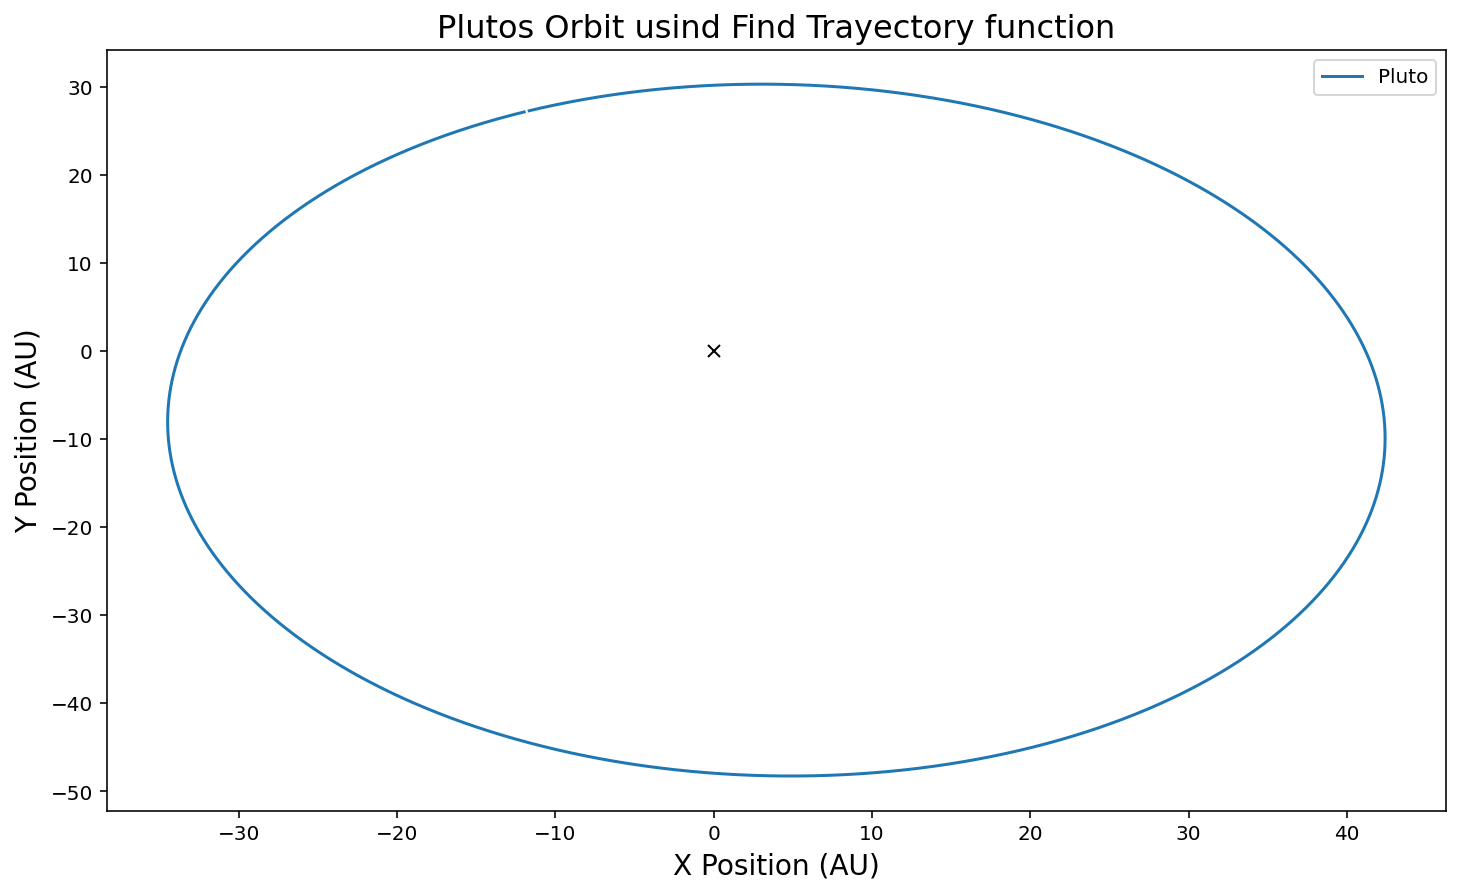

In [6]:
r0 = [-11.9661, 27.1367, 0.]  # AU
v0 = [-3.7382e-8, -1.6484e-8, 0.]
t_steps = np.arange(0, 86400*365*248,86400)

find_trajectory(r0, v0, planets, t_steps, sun_only=True)

pluto  = find_trajectory(r0, v0, planets, t_steps, sun_only=True)

pluto_x_positions = pluto[0][0]
pluto_y_positions = pluto[0][1]


plt.plot(pluto_x_positions,pluto_y_positions,label='Pluto')

plt.plot([0], [0], marker='x', color='black')
plt.xlabel('X Position (AU)', fontsize=14)
plt.ylabel('Y Position (AU)', fontsize=14)
plt.title('Plutos Orbit usind Find Trayectory function', fontsize=16)
plt.legend(loc='upper right', fontsize=10)

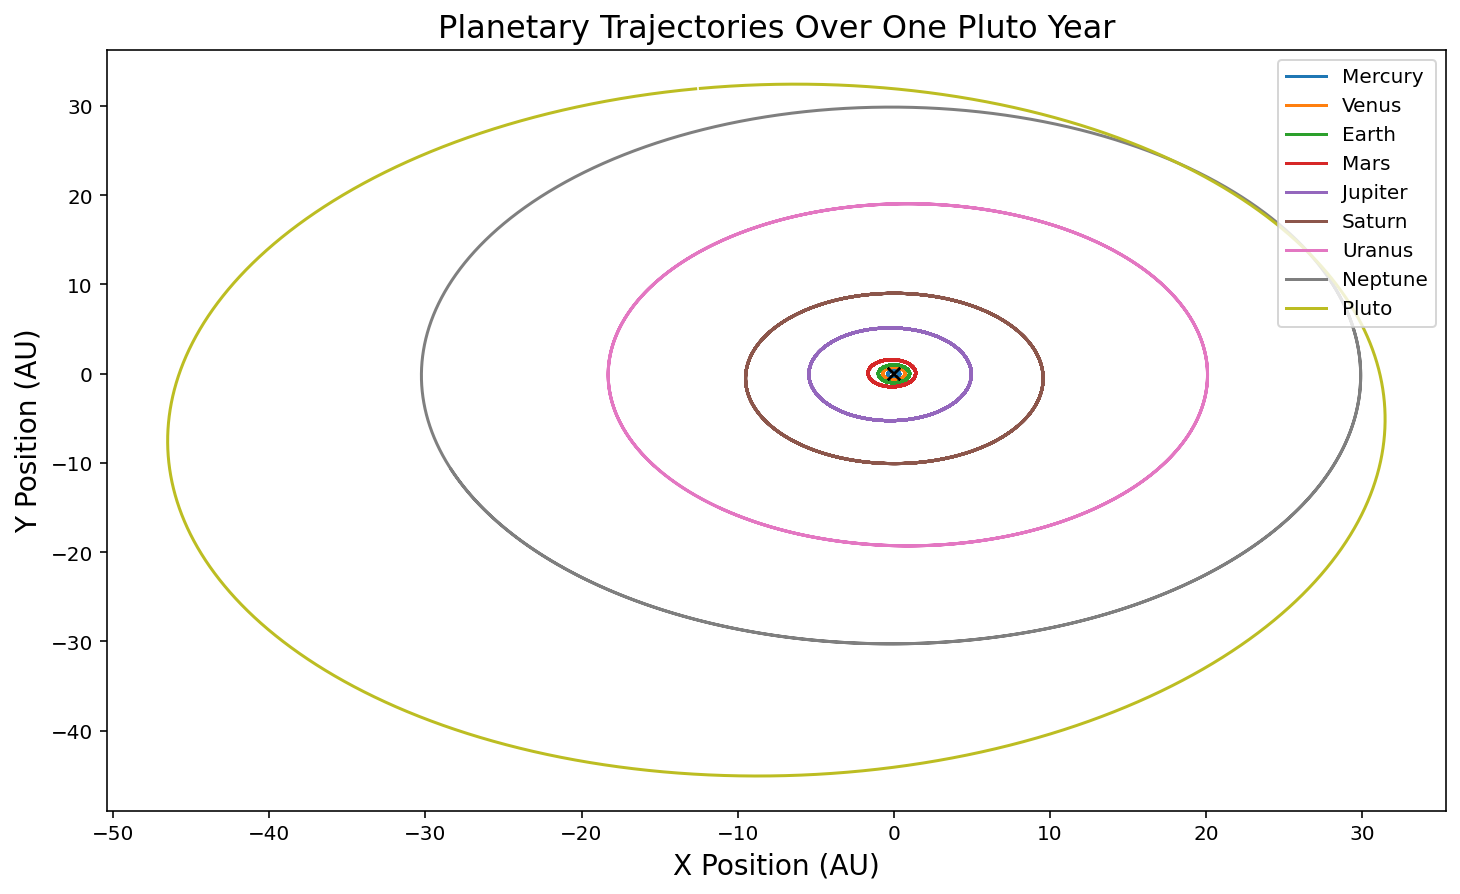

In [7]:

planet_names_and_pluto = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn','Uranus','Neptune','Pluto']  
pluto_array = np.array([39.48211675,0.24882730,113.79534612,265.9093415])
planets_and_pluto = np.vstack((planets, pluto_array)) #concatenate pluto's data into planets array

for i in range(0,len(planets_and_pluto)):
    x_pos = []
    y_pos = []
    for j in range(0,365*248):
        update_all_planets(planets_and_pluto, dt)
        #r = get_planet_r(planets)
        x_pos.append(get_planet_coords(planets_and_pluto)[i][0])
        y_pos.append(get_planet_coords(planets_and_pluto)[i][1])

    
    plt.plot(x_pos, y_pos, label=planet_names_and_pluto[i])
    plt.plot([0], [0], marker='x', color='black')
    plt.xlabel('X Position (AU)', fontsize=14)
    plt.ylabel('Y Position (AU)', fontsize=14)
    plt.title('Planetary Trajectories Over One Pluto Year', fontsize=16)
    plt.legend(loc='upper right', fontsize=10)


We got eliptical orbits for both graphs 3 and 4. In graph 3 we used the find trayectory function to plot Pluto's orbit, meanwhile in graph 4 we just added pluto's data into the planet's array and plotted it using the same code as in graphs 1 and 2. We observe that the orbit's match with each other, suggesting that the find trayectory function works correctly. The plot also matches the observed fact that Pluto's orbit slightly crosses Neptune's orbit.


### 2. An interstellar visitor

The first officially recorded interstellar object seen in our solar system was 1I/2017 U1, also known as ['Oumuamua](https://en.wikipedia.org/wiki/ʻOumuamua).  Since it came from outside the solar system, 'Oumuamua follows an _unbound_ orbit, which has a different equation than the one we have used so far.

Rather than go into the orbital mechanics of unbound orbits, for this exercise you may just take the following initial conditions for 'Oumuamua:

```python
r0 = [2.5181, -12.9111, 19.8869]  # AU
v0 = [-2.5432e-8, 9.8302e-8, -1.5547e-7]  # AU/s
```

which correspond to its position and speed on January 1, 2014.  Use the main loop to __reconstruct 'Oumuamua's path through the Solar System__.  (It's easy to look up that it was observed at perihelion around September 9, 2017; you should be able to verify that.)

Second, __find the distance of closest approach__ for 'Oumuamua to each of the planets in the __inner__ solar system (this is: Mercury, Venus, Earth, and Mars.)  Note that you will need to run your orbital model _backwards_ to get the positions of the planets right!  __How close did it come to the Earth__, in particular?

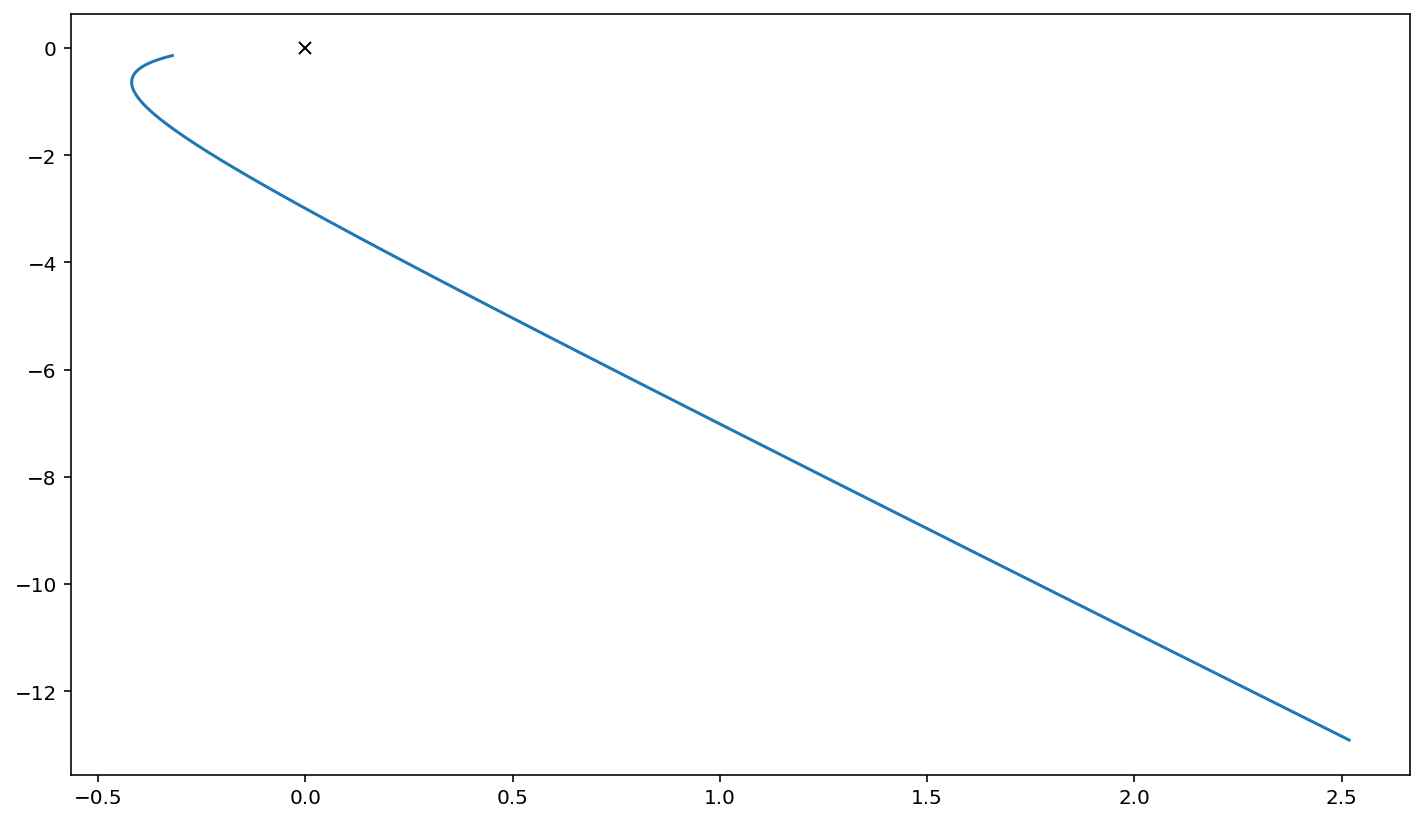

In [8]:
#Oumuamua's initial values
r0 = [2.5181, -12.9111, 19.8869]  # AU
v0 = [-2.5432e-8, 9.8302e-8, -1.5547e-7]  # AU/s

t_steps_oumuamua = np.arange(0,86400*1347,86400)#from january 1st 2014 to september 9 2017

#We use find_trayectory to calculate Oumuamua's trayectory
# We use an array called planets_copy because the original planets array get's changed in the previous question.
Oumuamua  = find_trajectory(r0, v0, planets_copy, t_steps_oumuamua, sun_only=True) 
#Find trayectory returns an r array with the coordinates at x,y,z with respect to tie in [0]
Oumuamua_x_positions = Oumuamua[0][0]
Oumuamua_y_positions = Oumuamua[0][1]


plt.plot(Oumuamua_x_positions,Oumuamua_y_positions)
plt.plot([0], [0], marker='x', color='black')

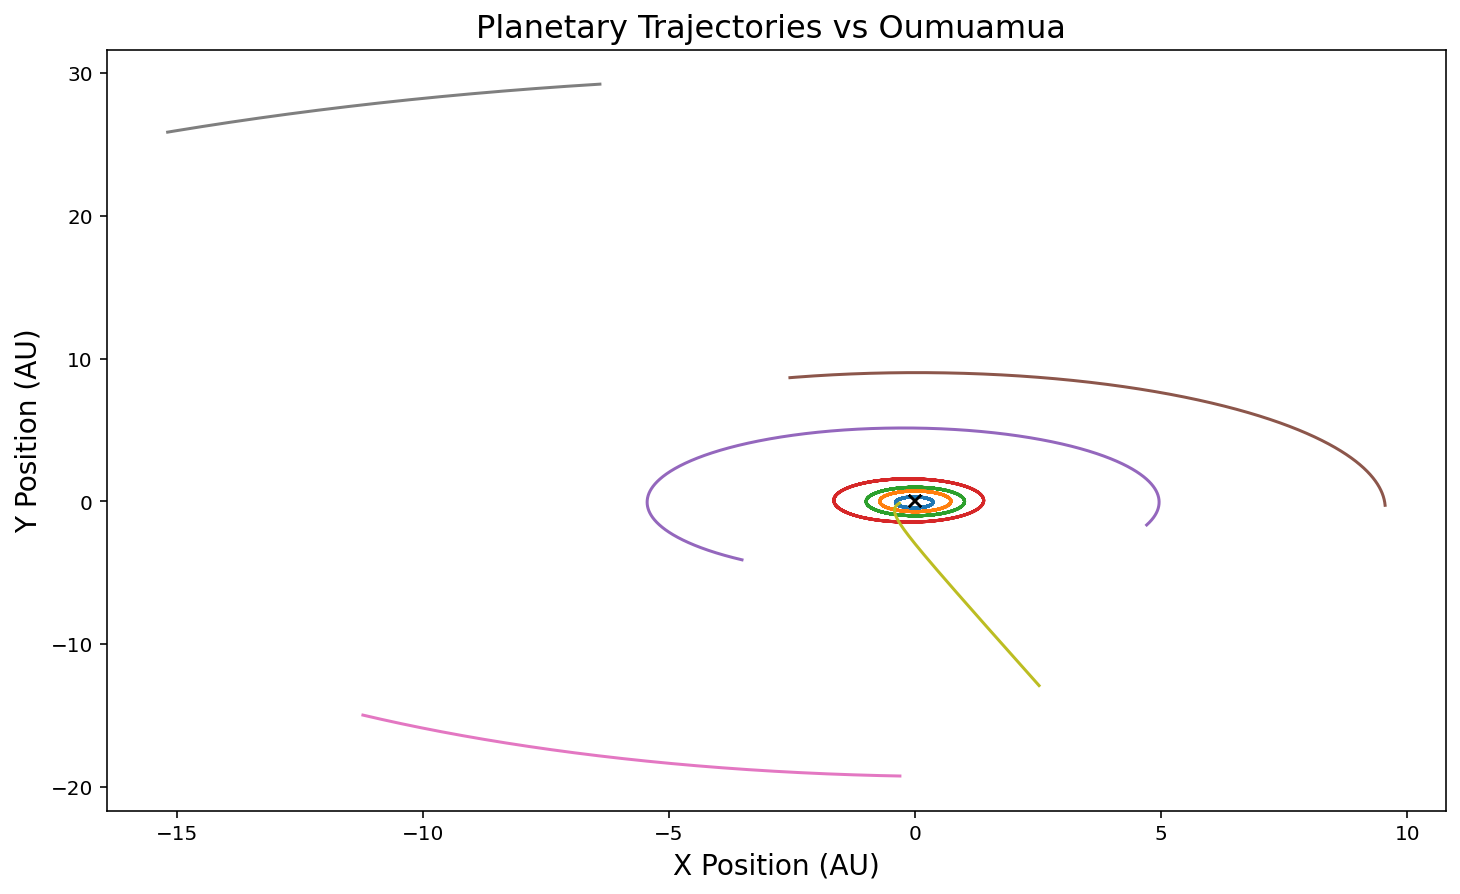

In [9]:
update_all_planets(planets_copy,-3241*86400) #going back to january 1st 2014
dt = 86400


for i in range(0,len(planets_copy)):
    x_positions_O = []
    y_positions_O = []
    for j in range(0, 3000): 
        update_all_planets(planets_copy, dt)
        #r = get_planet_r(planets)
        x_positions_O.append(get_planet_coords(planets_copy)[i][0])
        y_positions_O.append(get_planet_coords(planets_copy)[i][1])

    
    plt.plot(x_positions_O,y_positions_O)
    plt.plot([0], [0], marker='x', color='black')
    plt.xlabel('X Position (AU)', fontsize=14)
    plt.ylabel('Y Position (AU)', fontsize=14)
    plt.title('Planetary Trajectories vs Oumuamua ', fontsize=16)


plt.plot(Oumuamua_x_positions,Oumuamua_y_positions)
plt.plot([0], [0], marker='x', color='black')


In [10]:
Oumuamua_distances = Oumuamua[1] #Find trayectory returns the distance to the planets as  a function of time in [1]
min_distance = [] 
for i in range(0,4):
    
    #We iterate over Mercury to Mars and we use np.min to gather the minimal value in each array
    
    min_value = np.min(Oumuamua_distances[i]) 
    min_distance.append(min_value)
    

print("Closest distance to Mercury: ",min_distance[0]," Au")
print("Closest distance to Venus: ",min_distance[1]," Au")
print("Closest distance to Earth: ",min_distance[2]," Au")
print("Closest distance to Mars: ",min_distance[3]," Au")



Closest distance to Mercury:  0.602594631841249  Au
Closest distance to Venus:  0.32268221971096656  Au
Closest distance to Earth:  0.9332085878836341  Au
Closest distance to Mars:  1.7866653333341591  Au


### 3. Closest approach by comets

Our solar system has many comets, of various types.  A number of them originate in a region known as the [scattered disc](https://en.wikipedia.org/wiki/Scattered_disc), extending from roughly 30 to 100 AU from the Sun (beyond Neptune's orbit.)  These comets can have highly elliptical orbits, which means that they occasionally pass near the Sun and the inner planets.

The file `comets.csv` contains data on 30 hypothetical comets originating in the scattered disc, with high enough eccentricity to reach within a few AU of the Sun or closer.  Each line contains the initial parameters for one comet, in our coordinates, in the following comma-separated format:

```
(comet #),(x0),(y0),(z0),(vx_0),(vy_0),(vz_0)
```

To be clear, the distances are given in units of `AU`, and the speeds are in `km/s` (_not_ `AU/s`!)

Run your simulation __with only the Sun's gravity__ to begin with.  For each comet, find and record any __close approach__ to any of the eight planets over the next __50 years__ of its orbit, defining a close approach to be passing __within 0.2 AU of any planet__. (This isn't _that_ close: for reference, the Moon is only about 0.003 AU from the Earth.  But it's definitely close enough to be easily observable from the planet being approached.  Events that come really close to a planet are very rare - space is big!)  Clearly indicate __which comet number__ makes a close approach, to __which planet__, and __how close__ it gets.

Adjusting the numerical parameters is up to you!  I will give you one piece of potentially useful information, which you can also check with your simulation: none of the comets will ever reach a speed faster than _16 AU per year_.

_(Note: start with just one comet before you try to simulate 30 at once.  Don't worry too much if you can't resolve closed orbits for most of the comets using the main loop, some of the orbits are very long!  They have all been initialized so that they are approaching the Sun when the simulation begins.)_

Once you have answered the question above, __re-run the simulation including the gravitational acceleration due to Jupiter.__  How does your answer change, or not change?

In [11]:
def load_comets(comets_file):
    """
    Loads comets data set and returns it in the variable comets
    """
    with open('comets.csv', newline='') as comets_file:
        csv_reader = csv.reader(comets_file)
        comets = []
        for i in csv_reader:
            comets.append(i)
   
        return comets


comets = np.array(load_comets("comets.csv"),dtype=np.float64)
#convert to Au/s
comets[:, 4] = (6.68459*10**(-9))*comets[:, 4]
comets[:, 5] = (6.68459*10**(-9))*comets[:, 5]
comets[:, 6] = (6.68459*10**(-9))*comets[:, 6]

r0_all_comets = comets[:, 1:4] #(x0,y0,z0) positions
v0_all_comets = comets[:, -3:] #(vx0,vy0,vz0)
r0_comets = r0_all_comets.tolist()
v0_comets = v0_all_comets.tolist()

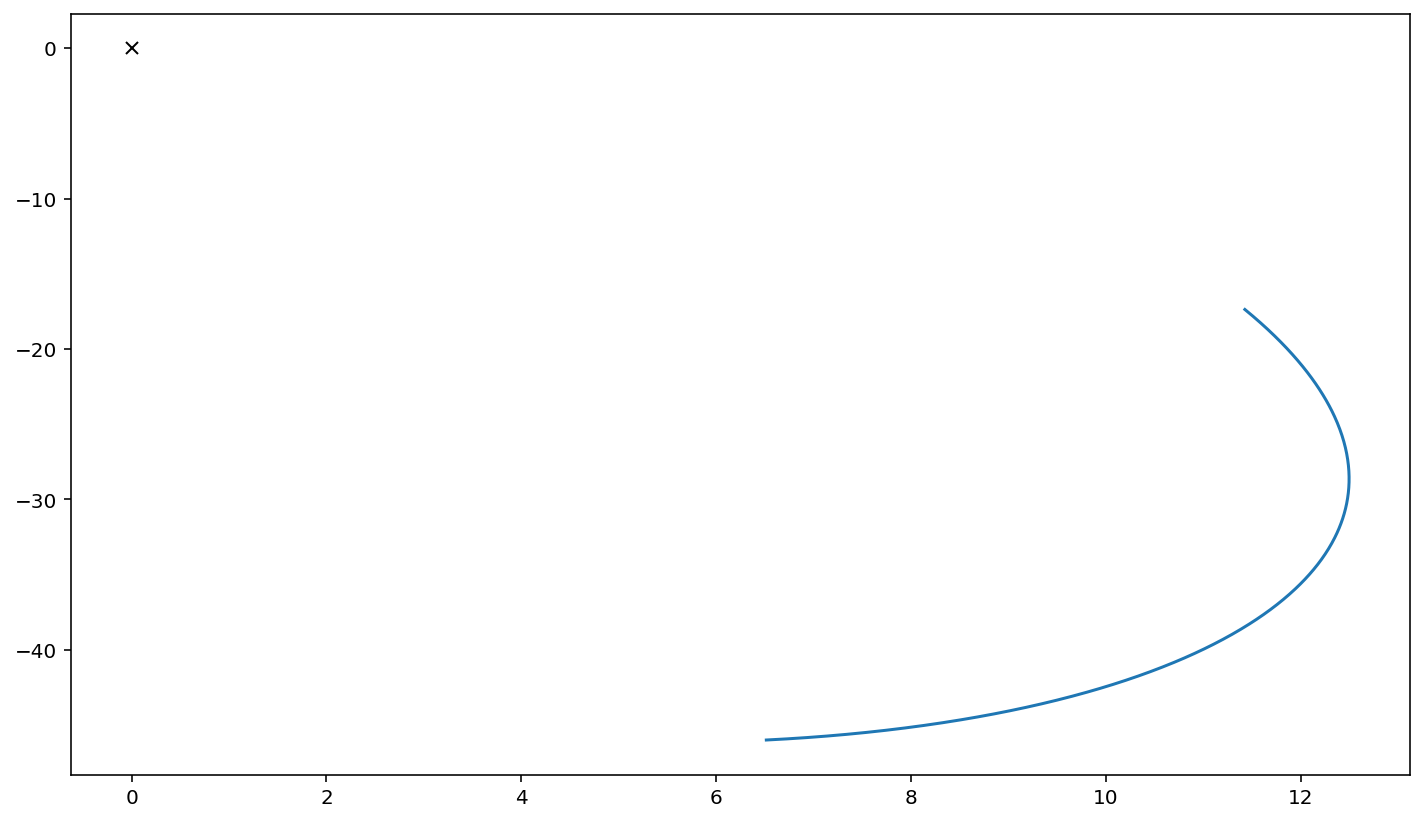

In [12]:
#plot for 1 comet
t_steps_comets = np.arange(0,86400*365*50,86400*30)
comet1  = find_trajectory(r0_comets[0], v0_comets[0], planets_copy2, t_steps_comets, sun_only=True) 
comet1_x_positions = comet1[0][0]
comet1_y_positions = comet1[0][1]


plt.plot(comet1_x_positions,comet1_y_positions)
plt.plot([0], [0], marker='x', color='black')







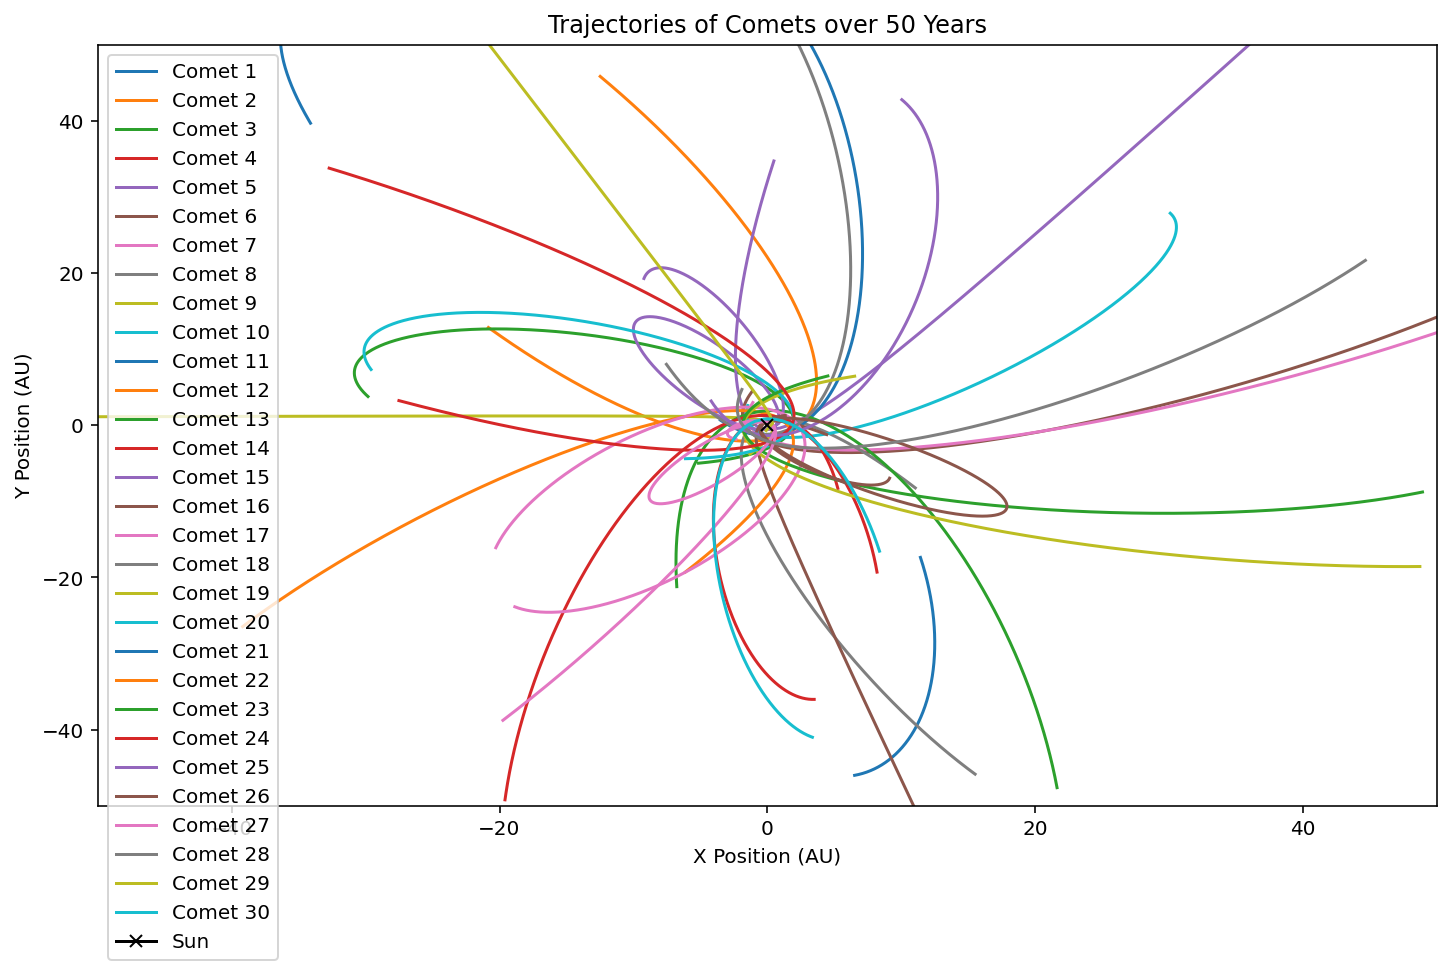

In [13]:
#plotting all of the comets
comet_distances = []
for i in range(len(comets)):
    comet_trajectory = find_trajectory(r0_comets[i], v0_comets[i], planets_copy2, t_steps_comets, sun_only=True)
    
    comet_x_positions = comet_trajectory[0][0]
    comet_y_positions = comet_trajectory[0][1]
    comet_distances.append(comet_trajectory[1])
    plt.plot(comet_x_positions, comet_y_positions, label=f'Comet {i+1}')

plt.plot([0], [0], marker='x', color='black',  label='Sun')

plt.xlim(-50,50)
plt.ylim(-50,50)
plt.xlabel('X Position (AU)')
plt.ylabel('Y Position (AU)')
plt.title('Trajectories of Comets over 50 Years')
plt.legend()  

# Display the plot
plt.show()


In [14]:
close_distances = []
comet_names = [str(i) for i in range(1, 31)]

for i in range(len(comet_names)):  # Assuming length of comet_names matches the data structure
    for j in range(len(planet_names)):  # Assuming length of planet_names matches the data structure
        for distance in comet_distances[i][j]:  # Assuming this structure contains distances from i-th comet to j-th planet
            if distance <= 0.2:
                # Append names along with the distance
                close_distances.append((comet_names[i], planet_names[j], distance))
print(close_distances)

[('16', 'Mercury', 0.17454843788111576), ('16', 'Mars', 0.1503626583006691), ('27', 'Venus', 0.1883758576373075), ('27', 'Venus', 0.05497837794587751), ('29', 'Venus', 0.19927377205186766)]


After runing the simulation for 50 years and taking into account only the sun's gravity, we've had 4 comets that have come close to any of the planets. We've got comet 16 that got close to Mercury and Mars by a distance of 0.174 and 0.150 Au respectively, comet 27 which got close to Venus by 0.054 Au, and comet 29 that got close to Venus by 0.199 Au.


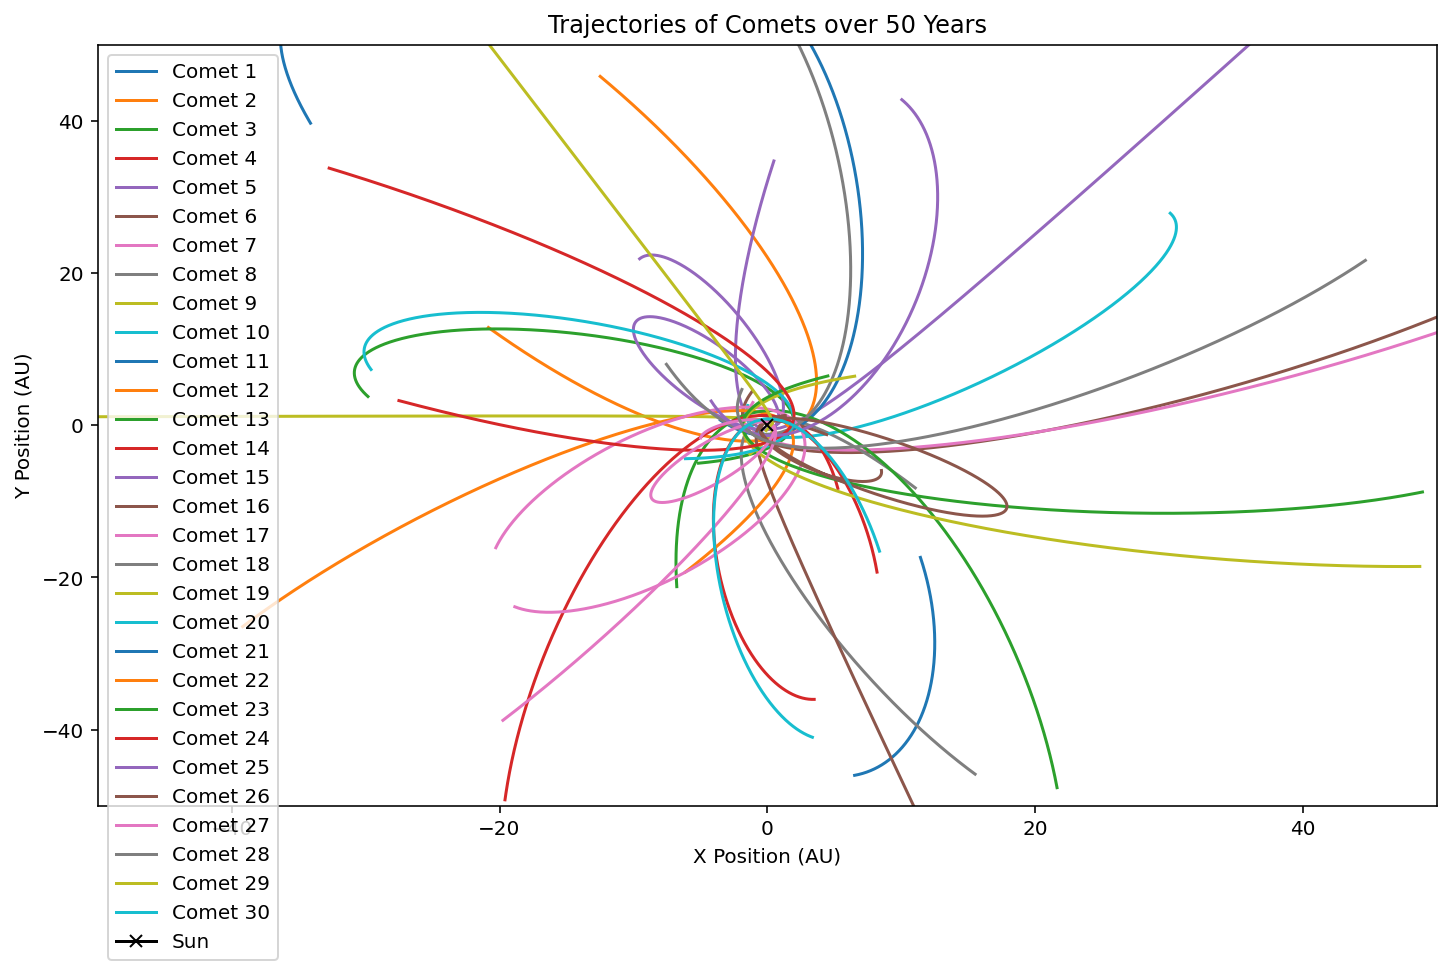

In [15]:
#Now with Jupyter's gravity

for i in range(len(r0_comets)):
    comet_trajectory = find_trajectory(r0_comets[i], v0_comets[i], planets_copy2, t_steps_comets, sun_only=False)
    
    comet_x_positions = comet_trajectory[0][0]
    comet_y_positions = comet_trajectory[0][1]
    
    plt.plot(comet_x_positions, comet_y_positions, label=f'Comet {i+1}')

plt.plot([0], [0], marker='x', color='black',  label='Sun')

plt.xlim(-50,50)
plt.ylim(-50,50)

plt.xlabel('X Position (AU)')
plt.ylabel('Y Position (AU)')
plt.title('Trajectories of Comets over 50 Years')
plt.legend()  

# Display the plot
plt.show()


In [16]:
close_distances = []
comet_names = [str(i) for i in range(1, 31)]

for i in range(len(comet_names)):  # Assuming length of comet_names matches the data structure
    for j in range(len(planet_names)):  # Assuming length of planet_names matches the data structure
        for distance in comet_distances[i][j]:  # Assuming this structure contains distances from i-th comet to j-th planet
            if distance <= 0.2:
                # Append names along with the distance
                close_distances.append((comet_names[i], planet_names[j], distance))
print(close_distances)


[('16', 'Mercury', 0.17454843788111576), ('16', 'Mars', 0.1503626583006691), ('27', 'Venus', 0.1883758576373075), ('27', 'Venus', 0.05497837794587751), ('29', 'Venus', 0.19927377205186766)]


After runing the simulation for 50 years and taking into account Jupyter's and the sun's gravity, we've had 4 comets that have come close to any of the planets. We've got comet 16 that got close to Mercury and Mars by a distance of 0.174 and 0.150 Au respectively, comet 27 which got close to Venus by 0.054 Au, and comet 29 that got close to Venus by 0.199 Au.



### 4. [Extra-credit challenge!] Simulating the Trojan asteroids

Between two massive bodies, there exist points of equilibrium called __Lagrange points__ where the forces of gravity balance, and a third small object can remain in position.  There are five such points, some of which are stable to small perturbations.

The stable Lagrange points L4 and L5 of Jupiter famously have a large collection of asteroids, the "Trojan asteroids".  Using your simulation, find a stable "orbit" for an object around Jupiter's L4 or L5 Lagrange point.  Your orbit should be stable over a timescale of 100 years, and the object has to be in motion relative to the Lagrange point.  (Of course, your first task is just to _find_ the Lagrange point, so starting with objects at rest might be helpful.)